## 인스타그램 크롤링
---
1. 인스타그램 URL을 만들어서 접속 
2. 제일 처음 게시물을 클릭하여 내용을 가져온다.
3. 그다음 차례대로 옆으로 이동하며 내용을 가져온다.



### 인스타그램  접속하기
---
 chorme driver를 통해 인스타그램에 접속 해보자.

In [103]:
from selenium import webdriver

driver = webdriver.Chrome('chromedriver.exe')

In [104]:
import time

# 인스타그램 접속하기
driver.get('https://www.instargram.com')
time.sleep(3)

인스타그램은 계정을 로그인하여야 원활한 크롤링을 진행 할 수 있다.

In [140]:
# 인스타계정으로 로그인
insta_id = '인스타그램 ID 입력'   
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
password = 'PW 입력' 
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]

input_id.send_keys(insta_id)
input_pw.send_keys(password)

first = driver.find_element_by_css_selector("#loginForm > div.Igw0E.IwRSH.eGOV_._4EzTm.kEKum > div:nth-child(3)")
first.click()

### 인스타그램 검색 url 접속
---
인스타그램의 검색 결과 페이지의 주소는 **URL 주소**로 표현할 수 있다.  

searching 함수는 키워드에 따른 인스타그럼 검색 결과 URL을 생성해 return 해준다.  

In [105]:
def searching(word):
    url = 'https://www.instagram.com/explore/tags/'+word
    return url

'부산맛집'을 검색하는 URL을 생성하여 이동한다.

In [106]:
word = '부산맛집'
url = searching(word)
driver.get(url)

### 첫 번째 게시글 열기
---

selenium으로 첫 번째 게시글을 클릭.

In [107]:
def click_first(driver):
    first = driver.find_element_by_css_selector('#react-root > section > main > article > div:nth-child(3) > div > div:nth-child(1) > div:nth-child(1) > a > div.eLAPa > div._9AhH0')
    first.click()
    time.sleep(3)
click_first(driver)

click_first() 함수에서 find_element_by_css_selector 를 사용해 해당 요소를 찾아 클릭한다.  
그리고 정보를 로딩하는데 시간이 걸릴 수 있기 때문에 time.sleep(3) 를 통해 3초정도 대기 시켜준다.

### 게시글 정보 가져오기
---
게시글에는 본문 내용, 작성 일시, 위치 정보,좋아요 수 등을 가지고 올 수 있다.



#### 게시글 정보를 가져오는 순서
---
1. 현재 게시글 html 정보 가져오기
2. 본문 내용 가져오기
3. 작성 일시, 좋아요 수 , 위치 정보 가져오기
4. 리스트로 저장

In [110]:
import re
from bs4 import BeautifulSoup

def get_content(driver):
    
    # 1. 현재 게시글 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')

    
    # 2. 본문 내용 가져오기
    # 본문 내용이 없을 수 있으므로 예외 처리구문을 이용
    try:
        content = soup.select('div.C4VMK > span')[0].text
    except:
        content = ' '
        
    # 3. 작성 일시, 좋아요 수 , 위치 정보 가져오기
    # 해쉬 태그는 정규 표현식을 이용해 가져온다.
    tags = re.findall(r'#[^\s#,\\]+', content)  
    
    #  작성일자 정보 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    
    #  좋아요 수 가져오기
    # 예외처리구문.
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
    # 위치정보
    # 예외 처리구문
    try: 
        place = soup.select('div.M30cS')[0].text
    except:
        place = ''
    # 4. 저장하기
    data = [content, date, like, place, tags]
    return data

get_content(driver) 

['카레맛집❤-전포카페 거리가족들이랑♡-#일상 #부산맘#카레#전포맛집#부산맛집 #카가와식당 #가족스타그램',
 '2020-08-27',
 '',
 '전포동',
 ['#일상', '#부산맘', '#카레', '#전포맛집', '#부산맛집', '#카가와식당', '#가족스타그램']]

### 다음 게시글로 이동하고 이어서 크롤링 진행.
---
화살표의 위치를 next_page 라는 변수로 지정한 뒤 click() 명령어를 통해 마우스로 클릭하는 것과 동일한 동작을 수행

In [151]:
def move_next(driver):
    next_page = driver.find_element_by_css_selector('body > div._2dDPU.CkGkG > div.EfHg9 > div > div > a._65Bje.coreSpriteRightPaginationArrow')
    next_page.click()
    time.sleep(3)
move_next(driver)

### 원하는 게시글 수만큼 크롤링 진행
---
앞에서 만든 함수들을 이용해 여러 게시글 정보를 수집해보자.

In [152]:

word = "부산맛집"    #검색어
url = insta_search(word)

# 검색페이지 접속
driver.get(url)
time.sleep(3)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
ex = [ ]


# 여러 게시글 수집하기
target = 10      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_hashtag(driver)    # 게시글 정보 가져오기
        ex.append(data)
        move_next(driver)
    except:
        time.sleep(5)
        move_next(driver)

In [153]:
ex = pd.DataFrame(ex)
ex

,0,1,2,3,4
0,.오늘은 #녹우 초이스.코로나에 태풍에 진짜 사람이 없긴없구나_.여기 #살치살 살살...,2020-08-26,2,,"[#녹우, #살치살, #소주가_술술.....👀시술, #일상, #소통, #하루, #일..."
1,내가 꼭 퀸가현처럼 롤렉스사주께 ^^,2020-08-26,8,"Busan, South Korea",[]
2,<수영 나마사케 입니다>#퇴근#부산#나마사케#사케##수영역#센텀병원#신세계#센텀해운...,2020-08-26,1,,"[#퇴근, #부산, #나마사케, #사케, #수영역, #센텀병원, #신세계, #센텀해..."
3,꽃돼지 잘먹었습니다~^^#부산꽃돼지#사상맛집 #덕천맛집 #부산맛집 #부산맛집추천 #...,2020-08-26,,,"[#부산꽃돼지, #사상맛집, #덕천맛집, #부산맛집, #부산맛집추천, #부산맛집꽃돼..."
4,"#부산취미미술 #반려동물초상화/#수강생작품 ✍🏻직사각25cm, 시바견 폴리💙하루에 ...",2020-08-26,3,Art studio On 아트스튜디오 온,"[#부산취미미술, #반려동물초상화/, #수강생작품]"
5,몸매플렉스😄오늘도 💯.코로나방역수칙 철저히 지킵니당1미터이상 거리두기 실천중#코로나...,2020-08-26,2,부산광역시 주례동,"[#코로나조심, #냉정핑크바, #pinkbar, #냉정맛집, #주례동술집, #냉정술..."
6,<수영 나마사케 입니다>#퇴근#부산#나마사케#사케##수영역#센텀병원#신세계#센텀해운...,2020-08-26,2,,"[#퇴근, #부산, #나마사케, #사케, #수영역, #센텀병원, #신세계, #센텀해..."
7,사진 보니까 또 배고프다 '-'...#마마된장 #서면맛집 #서면 #세트 #소고기된장...,2020-08-26,2,"Busan, South Korea","[#마마된장, #서면맛집, #서면, #세트, #소고기된장찌개, #삼겸살, #맛집, ..."
8,여긴 진짜다!! 양파소스장에 찍어먹으니깐 대존맛!#명성오리불고기 인정이다진짜!!#엄...,2020-08-26,1,,"[#명성오리불고기, #엄궁, #사상, #하단, #부산데이트코스, #사상맛집, #엄궁..."
9,내가젤루조아하는조개구이😍😚😋진짜3년만에먹는조개구이😝🤩🦐🦪남친은이날처음으로내가조개구이...,2020-08-26,3,,"[#맛집, #부산맛집, #부산조개구이, #태종대, #태종대조개구이, #태종대조개구이..."


크롤링이 잘 진행 되는것을 알 수 있다.   
이제 원하는 검색어를 입력해 크롤링을 진행해보자.

나는 **부산맛집, 부산데이트, 부산여행** 의 검색어를 통해 게시글내용을 크롤링하였다.

In [87]:

word = "부산맛집"    #검색어
url = insta_search(word)

# 검색페이지 접속
driver.get(url)
time.sleep(3)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
results = [ ]


# 여러 게시글 수집하기
target = 1000      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_hashtag(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(5)
        move_next(driver)

In [88]:
# 인스타그램 검색페이지 URL 만들기
word = '부산데이트'
url = insta_search(word)

# 검색페이지 접속
driver.get(url)
time.sleep(3)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
results2 = [ ]


# 여러 게시글 수집하기
target = 1000      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시 2초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_hashtag(driver)    # 게시글 정보 가져오기
        results2.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)    

In [89]:
# 인스타그램 검색페이지 URL 만들기
word = '부산여행'
url = insta_search(word)

# 검색페이지 접속
driver.get(url)
time.sleep(3)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
results3 = [ ]


# 여러 게시글 수집하기
target = 1000      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시 2초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_hashtag(driver)    # 게시글 정보 가져오기
        results3.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)

In [90]:
#크롤링 데이터 저장하기.

import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('./excel/busan_matjip.xlsx')
results2_df = pd.DataFrame(results2)
results2_df.columns = ['content','data','like','place','tags']
results2_df.to_excel('./excel/busan_date.xlsx')
results3_df = pd.DataFrame(results3)
results3_df.columns = ['content','data','like','place','tags']
results3_df.to_excel('./excel/busan_travel.xlsx')


### 크롤링 데이터 중복 처리 
---
drop_duplicates 함수를 이용하여 크롤링한 데이터의 중복을 제거 해주자.  
1. 먼저 3개의 데이터프레임을 합쳐준다
2. 필요한 열만 추출 한다.
2. drop_duplicates 함수를 적용시킨다.

In [191]:
df = pd.DataFrame([])
df.append(results)
df.append(results2)
df=df.append(results3)

In [2]:
df = busan_df
df.columns = ['본문','시간','좋아요','위치','해쉬태그']
df.head(3)

,본문,시간,좋아요,위치,해쉬태그
0,"골벗 정회원대회태풍온다길래 취소되는줄알고 조마조마했드만,비는 오지도않고 날씨는 란딩...",2020-08-26,NaN,동부산cc,"['#KPGA', '#시티원골프연습장', '#레슨프로', '#부산', '#부산골프레..."
1,틀린 그림 찾깅,2020-08-26,4,"Busan 釜山, South Korea",[]
2,해운대 프라이빗한 공간이 핫한 해운대 스케줄청담 스케줄이 유명한건 알았지만 해운대에...,2020-08-26,4,스케줄해운대,"['#부산맛집', '#부산밥집', '#food', '#foodstagram', '#..."


In [3]:
df.drop_duplicates(subset = ['본문'] , inplace = True)

In [4]:
df=df.reset_index(drop=True)

In [1]:
import pandas as pd
busan_df = pd.DataFrame( [ ] )

folder = './excel/'
f_list = ['busan_matjip.xlsx', 'busan_date.xlsx', 'busan_travel.xlsx']

for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    busan_df = busan_df.append(temp)


busan_df = busan_df[['content','data','like','place','tags']]
busan_df.head()

,content,data,like,place,tags
0,"골벗 정회원대회태풍온다길래 취소되는줄알고 조마조마했드만,비는 오지도않고 날씨는 란딩...",2020-08-26,NaN,동부산cc,"['#KPGA', '#시티원골프연습장', '#레슨프로', '#부산', '#부산골프레..."
1,틀린 그림 찾깅,2020-08-26,4,"Busan 釜山, South Korea",[]
2,해운대 프라이빗한 공간이 핫한 해운대 스케줄청담 스케줄이 유명한건 알았지만 해운대에...,2020-08-26,4,스케줄해운대,"['#부산맛집', '#부산밥집', '#food', '#foodstagram', '#..."
3,#부산맛집 #신평맛집 #영진돼지국밥 #수육백반 #돼지국밥,2020-08-26,NaN,NaN,"['#부산맛집', '#신평맛집', '#영진돼지국밥', '#수육백반', '#돼지국밥']"
4,하 배불러 죽게따요 얼굴색이 빨리 돌아오면 좋겠어요 😭또르르 진짜 왕 깜상 ㅠ ㅠ,2020-08-26,11,NaN,[]


In [ ]:
#  중복 데이터 제거하고 저장하기
busan_df.drop_duplicates(subset = [ "content"] , inplace = True)
busan_df.to_excel('./excel/total.xlsx', index = False)

### 워드클라우드
---
크롤링한 데이터에서 해쉬태그만 불러옵니다.  
그리고 빈도수를 확인한후 워드 클라우드로 시각화 합니다. 

In [171]:
df['해쉬태그']

0       ['#KPGA', '#시티원골프연습장', '#레슨프로', '#부산', '#부산골프레...
1                                                      []
2       ['#부산맛집', '#부산밥집', '#food', '#foodstagram', '#...
3         ['#부산맛집', '#신평맛집', '#영진돼지국밥', '#수육백반', '#돼지국밥']
4                                                      []
                              ...                        
2413    ['#해리단하우스', '#부산', '#해운대', '#광...
2414                                                   []
2415                                                   []
2416    ['#제주공항맛집', '#월정리맛집', '#서면맛집', '#강남맛집', '#홍대맛집...
2417    ['#휴무N출사', '#뭉게뭉게구름............', '#감서...
Name: 해쉬태그, Length: 2418, dtype: object

In [172]:
해쉬태그 = []
for 해쉬 in df['해쉬태그']:
    ex = 해쉬[2:-2].split("', '")
    for 태그 in ex:
        해쉬태그.append(태그)
해쉬태그

['#KPGA',
 '#시티원골프연습장',
 '#레슨프로',
 '#부산',
 '#부산골프레슨',
 '#부산골프연습장',
 '#대연동골프레슨',
 '#해운대골프레슨',
 '#서면골프레슨',
 '#필드레슨',
 '#개인레슨',
 '#서면맛집',
 '#대연동맛집',
 '#해운대맛집',
 '#부산맛집',
 '#부산경남최대골프동호회',
 '#네이버카페',
 '#골벗',
 '#오비야제발',
 '',
 '#부산맛집',
 '#부산밥집',
 '#food',
 '#foodstagram',
 '#먹스타그램',
 '#맛스타그램',
 '#해운대',
 '#해운대맛집',
 '#해운대맛집추천',
 '#청담',
 '#청담맛집',
 '#스케줄청담',
 '#스케줄해운대',
 '#해운대핫플',
 '#부산생일파티',
 '#룸카페',
 '#해운대밥집',
 '#해운대핫플레이스',
 '#딜노_해운대',
 '#부산맛집',
 '#신평맛집',
 '#영진돼지국밥',
 '#수육백반',
 '#돼지국밥',
 '',
 '#영도에서외식하기',
 '#돌집',
 '#보들보들순두부',
 '#라라소장',
 '#라라픽',
 '#라라맛집',
 '#영도맛집',
 '#부산맛집',
 '#돌집',
 '#보들보들순두부',
 '#커피미미옆',
 '#소문난주문진막국수',
 '#부산맛집',
 '#lfl',
 '#instafollow',
 '#fff',
 '#foodstagram',
 '#dailylook',
 '#selca',
 '#selstagram',
 '#instamood',
 '#데일리룩',
 '#맛스타그램',
 '#푸드스타그램',
 '#인친',
 '#소통',
 '#선팔',
 '#맞팔',
 '#좋아요반사',
 '#좋반',
 '#좋반테러',
 '#선팔하면맞팔',
 '#핫플레이스',
 '#데일리그램',
 '#럽스타그램',
 '#감성',
 '#카

### 해시태그 출현 빈도 집계
---
인스타그램 해시태그 를 살펴보고 빈도수를 기준으로 상위 해시태그 중 분석 과정에 불필요한 해시태그는 제외하고 분석을 진행.

In [173]:
from collections import Counter
해쉬태그_빈도수 = Counter(해쉬태그)
해쉬태그_빈도수

Counter({'#KPGA': 1,
         '#시티원골프연습장': 1,
         '#레슨프로': 1,
         '#부산': 222,
         '#부산골프레슨': 1,
         '#부산골프연습장': 1,
         '#대연동골프레슨': 1,
         '#해운대골프레슨': 1,
         '#서면골프레슨': 1,
         '#필드레슨': 1,
         '#개인레슨': 1,
         '#서면맛집': 86,
         '#대연동맛집': 8,
         '#해운대맛집': 81,
         '#부산맛집': 528,
         '#부산경남최대골프동호회': 1,
         '#네이버카페': 1,
         '#골벗': 1,
         '#오비야제발': 1,
         '': 688,
         '#부산밥집': 11,
         '#food': 15,
         '#foodstagram': 10,
         '#먹스타그램': 89,
         '#맛스타그램': 58,
         '#해운대': 101,
         '#해운대맛집추천': 18,
         '#청담': 1,
         '#청담맛집': 1,
         '#스케줄청담': 1,
         '#스케줄해운대': 1,
         '#해운대핫플': 16,
         '#부산생일파티': 1,
         '#룸카페': 1,
         '#해운대밥집': 4,
         '#해운대핫플레이스': 2,
         '#딜노_해운대': 1,
         '#신평맛집': 2,
         '#영진돼지국밥': 1,
         '#수육백반': 2,
         '#돼지국밥': 7,
         '#영도에서외식하기': 1,
         '#돌집': 2,
         '#보들보들순두부': 2,
         '#라

In [174]:
# 해쉬태그 빈도수를 내림차순으로 확인
해쉬태그_빈도수.most_common(20)

[('', 688),
 ('#부산맛집', 528),
 ('#부산여행', 429),
 ('#부산데이트', 327),
 ('#부산', 222),
 ('#부산여행', 118),
 ('#부산맛집', 114),
 ('#일상', 103),
 ('#해운대', 101),
 ('#부산핫플', 91),
 ('#먹스타그램', 89),
 ('#서면맛집', 86),
 ('#부산', 83),
 ('#해운대맛집', 81),
 ('#맞팔', 78),
 ('#부산카페', 77),
 ('#광안리', 72),
 ('#부산맛집추천', 71),
 ('#일상', 70),
 ('#서면', 70)]

In [175]:
# 불필요한 해쉬태그를 제거.

stopwords = ['','#부산데이트','#부산여행','#일상', '#선팔', '#부산','#먹스타그램', '#데이트', '#일상','#좋아요','#럽스타그램','#소통', '#맞팔','#부산맛집','#부산술집','#부산카페','#서울대','#교대','#부산호텔','#부산핫플']

해쉬태그_최종 = []
for tag in 해쉬태그:
    if tag not in stopwords:
        if len(tag)<10:
            해쉬태그_최종.append(tag)
        
해쉬태그_최종 = Counter(해쉬태그_최종)
해쉬태그_최종.most_common(20)

[('#해운대', 101),
 ('#서면맛집', 86),
 ('#부산', 83),
 ('#해운대맛집', 81),
 ('#광안리', 72),
 ('#부산맛집추천', 71),
 ('#일상', 70),
 ('#서면', 70),
 ('#좋반', 62),
 ('#맛스타그램', 58),
 ('#좋아요반사', 56),
 ('#데이트코스', 56),
 ('#데일리', 55),
 ('#daily', 55),
 ('#busan', 53),
 ('#소통', 47),
 ('#ootd', 47),
 ('#좋아요', 47),
 ('#데이트그램', 47),
 ('#여행', 46)]

### 워드 클라우드 그리기
---
워드 클라우드를 그릴 건데 밑에 갈메기 모양으로 그려서 부산을 대표한다는 의미를 내표 해보자.

In [118]:
#워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

font_path = "c:/Windows/Fonts/malgun.ttf"

In [167]:
import numpy as np
from PIL import Image
from wordcloud import STOPWORDS

busan_mask=np.array(Image.open('busan.png'))
busan_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [183]:
wc = WordCloud(font_path=font_path,
               background_color="black",
               max_words=150,
               relative_scaling=1,
               mask=busan_mask,
               stopwords=stopwords)
wc = wc.generate_from_frequencies(해쉬태그_최종)

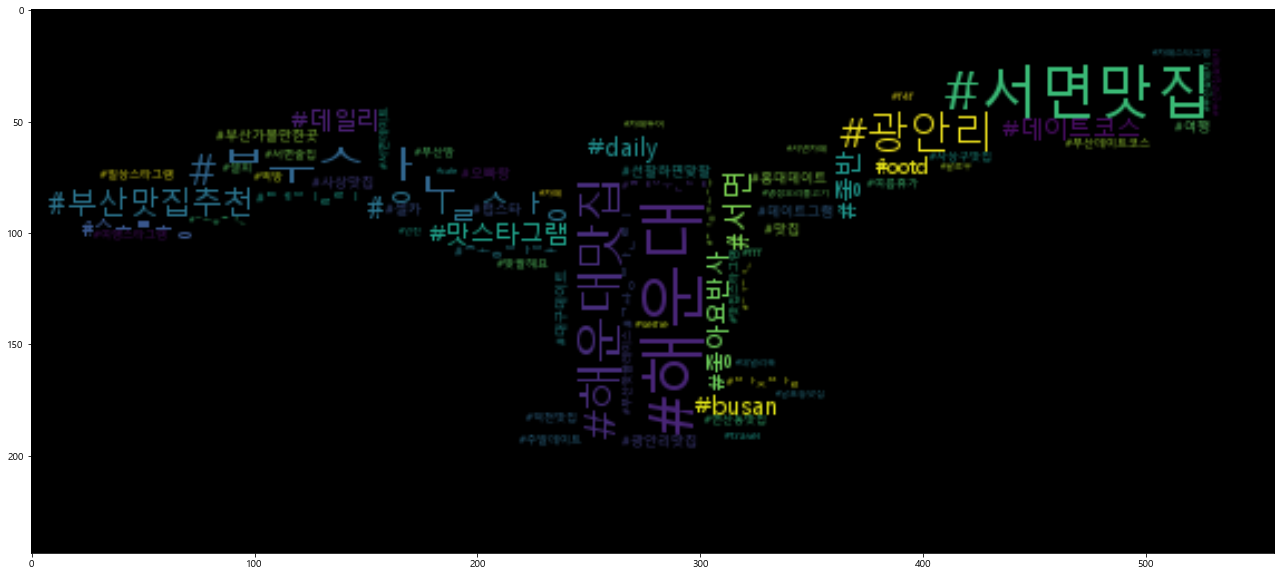

In [184]:
plt.figure(figsize=(30,10))
plt.imshow(wc,interpolation='bilinear')
plt.axis=('off')
plt.show()

갈메기 모양이 생각보다 잘 나오지 않아서 아쉬움이 크다. ^^ ;; 
배경 색을 흰색으로 해도 이상하다 .
그리고  전처리 과정이 조금 아쉬운거 같다..   
아무래도 관련없는 해쉬태그를 많이 다는 사람이 많기 떄문에 발생하는 문제인거 같다.

### 지도 시각화
---
카카오 맵 api를 이용해서 시각화를 진행해보자.

In [111]:
# 예제 4-20 크롤링 데이터 불러오기
import pandas as pd
raw_total = pd.read_excel('./excel/total.xlsx')
raw_total.head()

,content,data,like,place,tags
0,"골벗 정회원대회태풍온다길래 취소되는줄알고 조마조마했드만,비는 오지도않고 날씨는 란딩...",2020-08-26,NaN,동부산cc,"['#KPGA', '#시티원골프연습장', '#레슨프로', '#부산', '#부산골프레..."
1,틀린 그림 찾깅,2020-08-26,4,"Busan 釜山, South Korea",[]
2,해운대 프라이빗한 공간이 핫한 해운대 스케줄청담 스케줄이 유명한건 알았지만 해운대에...,2020-08-26,4,스케줄해운대,"['#부산맛집', '#부산밥집', '#food', '#foodstagram', '#..."
3,#부산맛집 #신평맛집 #영진돼지국밥 #수육백반 #돼지국밥,2020-08-26,NaN,NaN,"['#부산맛집', '#신평맛집', '#영진돼지국밥', '#수육백반', '#돼지국밥']"
4,하 배불러 죽게따요 얼굴색이 빨리 돌아오면 좋겠어요 😭또르르 진짜 왕 깜상 ㅠ ㅠ,2020-08-26,11,NaN,[]


In [28]:
#위치정보 가져오기
위치_빈도수 = df['위치'].value_counts( )
위치_빈도수

Busan 釜山, South Korea                                      92
Busan, South Korea                                         82
부산 광안리해수욕장 - 廣安里海水浴場 GwangalliBeach, Busan, South Korea    52
Haeundae, Busan                                            22
흰여울문화마을                                                    17
                                                           ..
부산주당                                                        1
0731커피로스터스                                                  1
수영구 광안동                                                     1
한창정보타운                                                      1
카페밀유                                                        1
Name: 위치, Length: 578, dtype: int64

In [29]:
#등록된 위치정보별 빈도수 데이터
위치_빈도수 = pd.DataFrame(위치_빈도수)
위치_빈도수.head()

,위치
"Busan 釜山, South Korea",92
"Busan, South Korea",82
"부산 광안리해수욕장 - 廣安里海水浴場 GwangalliBeach, Busan, South Korea",52
"Haeundae, Busan",22
흰여울문화마을,17


In [114]:
# 예제 4-23 위치정보 빈도수 데이터 저장하기
location_counts_df.to_excel('./excel/location_counts.xlsx')

In [115]:
# 예제 4-24 위치정보 종류 확인하기
locations = list( location_counts.index )
locations 

['Busan 釜山, South Korea',
 'Busan, South Korea',
 '부산 광안리해수욕장 - 廣安里海水浴場 GwangalliBeach, Busan, South Korea',
 'Haeundae, Busan',
 '흰여울문화마을',
 '전포동',
 '부산의중심 서면',
 '시그니엘부산',
 '더베이101',
 '부산 해운대',
 '서면 어딘가',
 '광안리',
 '쥬노이아',
 '경성대 맛집',
 '로빈뮤지엄',
 '송정해수욕장',
 'Daegu, South Korea',
 'Yangsan',
 'Gwangali Beach Korea',
 '영도',
 '감천문화마을',
 '부산 기장',
 'La valse hotel',
 '바게트호텔',
 '귀감',
 '스튜디오점포',
 '경성대학교 Kyungsung University',
 '블랑미뇽',
 '캔들피자',
 'Park Hyatt Busan - 파크하얏트부산',
 '셀픽스 부산_서면',
 '부산범일동',
 '부산 정관',
 '파라다이스호텔 부산',
 '전포카페거리 전리단길 전포사잇길',
 '광안리에서',
 '스게',
 '해운대',
 '부산',
 '앙로고택',
 '부산대학교 (Pusan National University)',
 '동래어딘가에서',
 '다대포 해수욕장 / Dadaepo Beach',
 'Ulsan, South Korea',
 '서면 칠린',
 'SEA LIFE 부산아쿠아리움',
 'Brown Hands 백제',
 '해운대 센텀시티',
 '동래시장',
 '경성대·부경대역',
 '부산 서면',
 'Steadyer.',
 '수월경화 : 물에 비친 달, 거울에 비친 꽃',
 '스케줄해운대',
 'Hilton Busan - 힐튼 부산',
 '김해시 외동',
 '뮤지엄다',
 '엣지993',
 'Busan 부산',
 '클래씨클로카 Classyclocca',
 '카페오니',
 '남포동',
 '칸다소바',
 '육그램',
 '별한스푼',
 '신기숲',
 '청사포항',
 '오늘와인한잔 동래점',


### 카카오맵 api를 이용하여 위도,경도 가져오기.
---
카카오맵 api를 이용하여 키워드를 입력하면 위도 경도를 반환해주는 함수를 작성해보자.

In [60]:
import requests
import sys

url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=부산광역시청'
apikey = 'apikey'


kakao= requests.get( url, params = {'query':query}, headers={'Authorization' : 'KakaoAK ' + apikey } ).json() 
kakao

{'documents': [{'address_name': '부산 연제구 연산동 1000',
   'category_group_code': 'PO3',
   'category_group_name': '공공기관',
   'category_name': '사회,공공기관 > 지방행정기관 > 시청 > 광역시청',
   'distance': '',
   'id': '27284326',
   'phone': '051-120',
   'place_name': '부산광역시청',
   'place_url': 'http://place.map.kakao.com/27284326',
   'road_address_name': '부산 연제구 중앙대로 1001',
   'x': '129.07506783124393',
   'y': '35.17973748292069'},
  {'address_name': '부산 연제구 연산동 1000',
   'category_group_code': 'BK9',
   'category_group_name': '은행',
   'category_name': '금융,보험 > 금융서비스 > 은행 > BNK부산은행',
   'distance': '',
   'id': '7898226',
   'phone': '051-852-0066',
   'place_name': '부산은행 부산시청지점',
   'place_url': 'http://place.map.kakao.com/7898226',
   'road_address_name': '부산 연제구 중앙대로 1001',
   'x': '129.074594167442',
   'y': '35.1801024581601'},
  {'address_name': '부산 연제구 연산동 1000',
   'category_group_code': 'PK6',
   'category_group_name': '주차장',
   'category_name': '교통,수송 > 교통시설 > 주차장',
   'distance': '',
   'id'

kakao 데이터에서 위도,경도, 장소이름에 대한 정보가 documents 에 저장돼 있음을 알 수 있다.  

In [57]:
장소이름 = kakao['documents'][0]['place_name']
경도= kakao['documents'][0]['x']
위도= kakao['documents'][0]['y']
print(위도,경도,장소이름)

35.17973748292069 129.07506783124393 부산광역시청


이제 위도,경도, 장소이름을 따로 가져와서 저장하는 함수 get_kakao()를 작성해 보자.

In [67]:

def get_kakao(query):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(query)
    apikey = '0407a2349ecda6d17bcefa82be4efd99'
    kakao= requests.get( url, params = {'query':query}, headers={'Authorization' : 'KakaoAK ' + apikey } ).json() 
    
    장소이름 = kakao['documents'][0]['place_name']
    경도= kakao['documents'][0]['x']
    위도= kakao['documents'][0]['y']
    kakao = [위도,경도,장소이름]

    return kakao
get_kakao('부산광역시청')

['35.17973748292069', '129.07506783124393', '부산광역시청']

get_kakao를 이용해 사전에 크롤링한 인스타그램 위치 데이터를 바탕으로 위도경도를 추출.  
 api를 가져올 떄 는 짧은 시간에 너무 많은 정보를 요구 하면 차단 당할 수 있기에 time.sleep() 함수를 이용핟여 대기 시간을 조절한다.

In [102]:
인스타그램_위치 = df['위치']
위치_get_kakao=[]
for 위치 in 인스타그램_위치:
    try:   
        위치_get_kakao.append(get_kakao(위치)) 
        time.sleep(0.5) 
    except:
        pass

In [186]:
위치_get_kakao=pd.DataFrame(위치_get_kakao)
위치_get_kakao.columns=['위도','경도','위치']
위치_get_kakao

,위도,경도,위치
0,35.3629930520716,129.18251602124,동부산컨트리클럽
1,35.1604590898844,129.162266187153,스케줄 해운대
2,37.590448495174364,127.02876401832988,앤에이앤
3,37.590448495174364,127.02876401832988,앤에이앤
4,37.590448495174364,127.02876401832988,앤에이앤
...,...,...,...
2004,35.1585232170784,129.159854668484,해운대해수욕장
2005,35.1636479638612,129.158897240251,해운대역 부산2호선
2006,35.1531932736837,129.118976093583,광안리해수욕장
2007,37.590448495174364,127.02876401832988,앤에이앤


In [119]:
# 예제 4-29 위치정보 저장하기
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_official','경도','위도','인스타위치명']
locations_inform_df.to_excel('./excel/3_3_locations.xlsx', index=False)

In [120]:
# 예제 4-30 인스타 게시량 및 위치정보 데이터 불러오기
location_counts_df = pd.read_excel('./excel/location_counts.xlsx', index_col = 0)
locations_inform_df = pd.read_excel('./excel/3_3_locations.xlsx')

In [121]:
# 예제 4-31 위치 데이터 병합하기
location_data = pd.merge(locations_inform_df, location_counts_df, 
                         how = 'inner', left_on = 'name_official', right_index=True)

location_data.head()

,name_official,경도,위도,인스타위치명,place
1,흰여울문화마을,129.045281,35.077915,흰여울문화마을,17
13,흰여울문화마을,129.045281,35.077915,영도,17
155,흰여울문화마을,129.045281,35.077915,부산광역시,17
246,흰여울문화마을,129.045281,35.077915,부산 영도,17
4,더베이101,129.152021,35.156565,더베이101,10


In [122]:
# 예제 4-32 병합한 데이터 저장하기
location_data.to_excel('./excel/location_inform.xlsx')

In [188]:


import folium
from folium.plugins import MarkerCluster

위도_경도= []
위치명= []

for i in range(len(위치_get_kakao)):
    data = 위치_get_kakao.iloc[i]  # 행 하나씩
    위도_경도.append((float(data['위도']),float(data['경도'])))    # 위도 , 경도 순으로..
    위치명.append(data['위치'])


busan =[35.1797957, 129.0727983]
busan = folium.Map(location = busan, zoom_start = 11)
                       
marker_cluster = MarkerCluster(
    locations=위도_경도, popups=위치명,
    name='Busan',
    overlay=True,
    control=True,

)

marker_cluster.add_to(busan)
folium.LayerControl().add_to(busan)

busan.save('map.html')